In [1]:
#Description: This program Uses moving Average Convergence/Divergence(MACD) crossover
#to determine when to buy and sell the stick.
#import the liberies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [2]:
#load the data
df=yf.Ticker('AAPL').history(start='2017-04-15',end='2017-8-15')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-04-17,33.299677,33.393826,33.156104,33.382057,66328400,0.0000,0
2017-04-18,33.283208,33.431487,33.212598,33.233780,58790000,0.0000,0
2017-04-19,33.393836,33.422079,33.057260,33.111393,69313600,0.0000,0
2017-04-20,33.238491,33.638614,33.224369,33.525639,93278400,0.0000,0
2017-04-21,33.525642,33.582128,33.386776,33.485630,69283600,0.0000,0
...,...,...,...,...,...,...,...
2017-08-08,37.483247,38.246619,37.405255,37.833027,144823600,0.0000,0
2017-08-09,37.639230,38.114273,37.603781,38.064640,104526000,0.0000,0
2017-08-10,37.938876,37.962604,36.688485,36.852200,163217200,0.1575,0


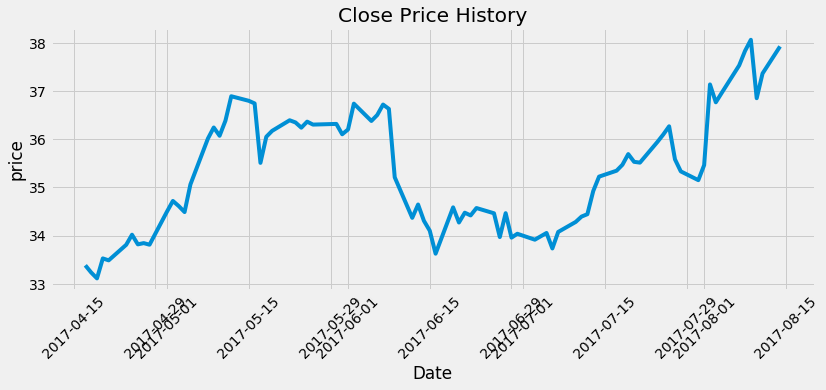

In [3]:
#Visually Show the data
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'],label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('price')
plt.show()

In [4]:
#Calculate the MACF and single line indicators
#Claculate the short term exponential moving average(EMA)
ShortEMA=df.Close.ewm(span=12,adjust=False).mean()
#calculate the long term exponential moving average (EMA)
LongEMA=df.Close.ewm(span=26,adjust=False).mean()
#Calculate the MACD line
MACD=ShortEMA-LongEMA
#Calculate The Signal line
Signal=MACD.ewm(span=9,adjust=False).mean()

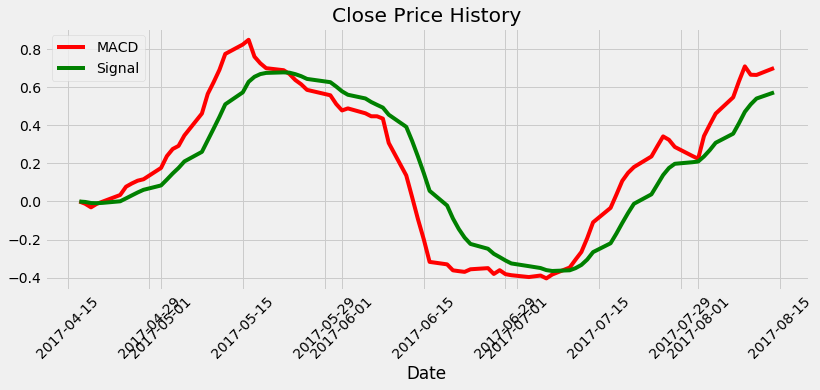

In [5]:
#plot the chart
plt.figure(figsize=(12.2,4.5))
#plt.plot(df['Close'],label='Close')
plt.plot(MACD,label='MACD',color='red')
plt.plot(Signal,label='Signal',color='green')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.show()

In [6]:
#Create new columns from the data
df['MACD']=MACD
df['Signal Line']=Signal
#show the data
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD,Signal Line
Date,,,,,,,,,
2017-04-17,33.299677,33.393826,33.156104,33.382057,66328400,0.0000,0,0.000000,0.000000
2017-04-18,33.283208,33.431487,33.212598,33.233780,58790000,0.0000,0,-0.011828,-0.002366
2017-04-19,33.393836,33.422079,33.057260,33.111393,69313600,0.0000,0,-0.030724,-0.008037
2017-04-20,33.238491,33.638614,33.224369,33.525639,93278400,0.0000,0,-0.012133,-0.008856
2017-04-21,33.525642,33.582128,33.386776,33.485630,69283600,0.0000,0,-0.000620,-0.007209
...,...,...,...,...,...,...,...,...,...
2017-08-08,37.483247,38.246619,37.405255,37.833027,144823600,0.0000,0,0.632774,0.411834
2017-08-09,37.639230,38.114273,37.603781,38.064640,104526000,0.0000,0,0.710533,0.471574
2017-08-10,37.938876,37.962604,36.688485,36.852200,163217200,0.1575,0,0.666639,0.510587


In [7]:
#create as singnal when to buy and when to sell an asset
def buy_sell(signal):
    Buy=[]
    Sell=[]
    flag=-1
    for i in range(len(signal)):
        if signal['MACD'][i]>signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag !=1:
                Buy.append(signal['Close'][i])
                flag=1
            else:
                Buy.append(np.nan)
                
        elif signal['MACD'][i]<signal['Signal Line'][i]:
            Buy.append(np.nan)
            if flag !=0:
                Sell.append(signal['Close'][i])
                flag=0
            else:
                Sell.append(np.nan)
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
        return (Buy,Sell)
        
    

In [8]:
buy_sell(df)

([nan], [nan])

In [9]:
def buy_sell_function(signal):
    Buy=[]
    Sell=[]
    flag=-1
    for i in range (0,len(signal)):
        if signal['MACD'][i]>signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag !=1:
                Buy.append(signal['Close'][i])
                flag=1
            else:
                Buy.append(np.nan)
        elif signal['MACD'][i]<signal['Signal Line'][i]:
            Buy.append(np.nan)
            if flag !=0:
                Sell.append(signal['Close'][i])
                flag=0
            else:
                Sell.append(np.nan)
            
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)


            

    return(Buy,Sell)

In [10]:
a=buy_sell_function(df)
df['Buy Signal Price']=a[0]
df['Sell signal Price']=a[1]

In [11]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD,Signal Line,Buy Signal Price,Sell signal Price
Date,,,,,,,,,,,
2017-04-17,33.299677,33.393826,33.156104,33.382057,66328400,0.0000,0,0.000000,0.000000,NaN,NaN
2017-04-18,33.283208,33.431487,33.212598,33.233780,58790000,0.0000,0,-0.011828,-0.002366,NaN,33.23378
2017-04-19,33.393836,33.422079,33.057260,33.111393,69313600,0.0000,0,-0.030724,-0.008037,NaN,NaN
2017-04-20,33.238491,33.638614,33.224369,33.525639,93278400,0.0000,0,-0.012133,-0.008856,NaN,NaN
2017-04-21,33.525642,33.582128,33.386776,33.485630,69283600,0.0000,0,-0.000620,-0.007209,33.48563,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2017-08-08,37.483247,38.246619,37.405255,37.833027,144823600,0.0000,0,0.632774,0.411834,NaN,NaN
2017-08-09,37.639230,38.114273,37.603781,38.064640,104526000,0.0000,0,0.710533,0.471574,NaN,NaN
2017-08-10,37.938876,37.962604,36.688485,36.852200,163217200,0.1575,0,0.666639,0.510587,NaN,NaN


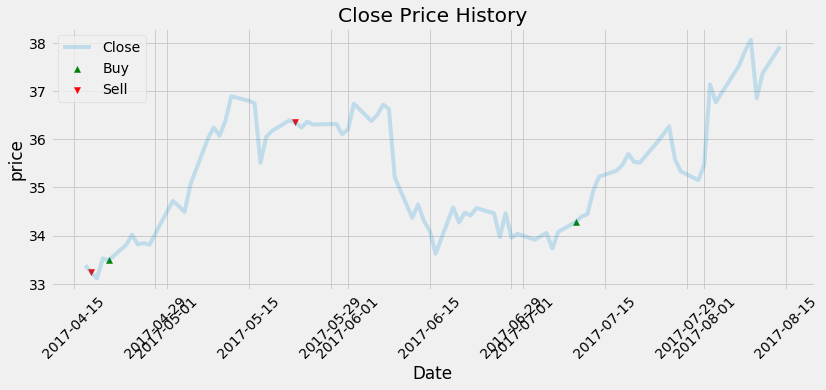

In [12]:
#Visually Show the stock Buyand sell signals
#Visually Show the data
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'],label='Close',alpha=0.2)
plt.scatter(df.index,df['Buy Signal Price'],color='Green',label='Buy',marker='^',alpha=1)
plt.scatter(df.index,df['Sell signal Price'],color='red',label='Sell',marker='v',alpha=1)
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend(loc='upper left')
plt.show()